<a href="https://colab.research.google.com/github/pyayivargitam/Infosys-Assignments/blob/main/model_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Baseline Models Evaluation & Error Analysis (Using Pickle Models)**

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plotting style
sns.set(style="whitegrid")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_earthquake_data (2).csv to preprocessed_earthquake_data (2) (1).csv


In [8]:
## Load and split the dataset
df = pd.read_csv('/content/preprocessed_earthquake_data (2) (1).csv')
drop_columns = ['Type','Magnitude Type','Status', 'Source', 'Year', 'Day']  # Adjust as necessary
X = df.drop(columns=drop_columns + ['Status_Reviewed'])
y = df['Status_Reviewed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
import joblib
# Load models
logreg = joblib.load('/content/logreg_earthquake_status_reviewed (1).pkl')
dtree = joblib.load('/content/dtree_earthquake_status_reviewed.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
# Model Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

In [13]:
## Classification Metrics and Plots (for classification task)
def print_classification_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} Metrics ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_true, y_pred))

print_classification_metrics(y_test, y_pred_logreg, "Logistic Regression")
print_classification_metrics(y_test, y_pred_dtree, "Decision Tree")

--- Logistic Regression Metrics ---
Accuracy: 1.0
F1-score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682

--- Decision Tree Metrics ---
Accuracy: 1.0
F1-score: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       503
         1.0       1.00      1.00      1.00      4179

    accuracy                           1.00      4682
   macro avg       1.00      1.00      1.00      4682
weighted avg       1.00      1.00      1.00      4682



In [14]:
# Confusion Matrices
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

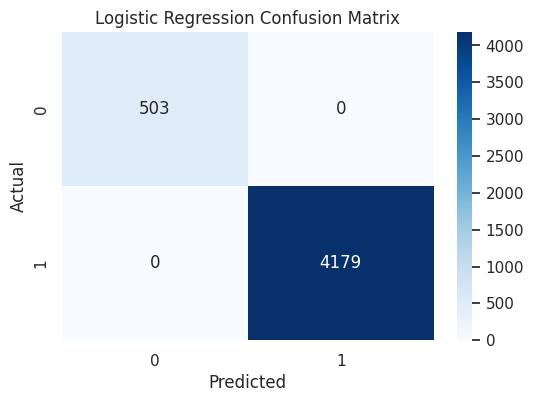

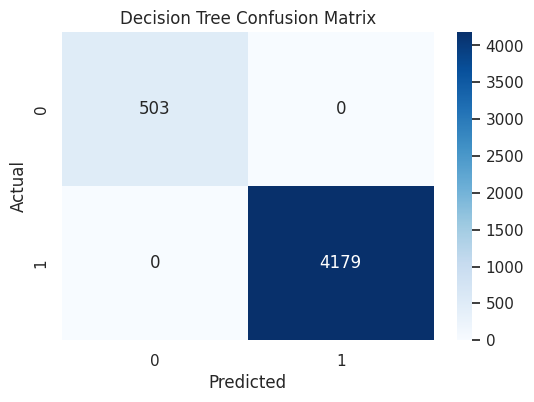

In [15]:
plot_confusion(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")
plot_confusion(y_test, y_pred_dtree, "Decision Tree Confusion Matrix")

In [16]:
# --- For regression tasks ---
print("MAE:", mean_absolute_error(y_test, y_pred_logreg))
print("MSE:", mean_squared_error(y_test, y_pred_logreg))
print("R² score:", r2_score(y_test, y_pred_logreg))

MAE: 0.0
MSE: 0.0
R² score: 1.0


In [17]:
print("MAE:", mean_absolute_error(y_test, y_pred_dtree))
print("MSE:", mean_squared_error(y_test, y_pred_dtree))
print("R² score:", r2_score(y_test, y_pred_dtree))

MAE: 0.0
MSE: 0.0
R² score: 1.0


In [18]:
# 4. Error Analysis
# Identify misclassified examples
misclassified_logreg = X_test[y_test != y_pred_logreg]
misclassified_dtree = X_test[y_test != y_pred_dtree]
print("--- Misclassified Samples (Logistic Regression) ---")
display(misclassified_logreg.head())

--- Misclassified Samples (Logistic Regression) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW


In [19]:
print("--- Misclassified Samples (Decision Tree) ---")
display(misclassified_dtree.head())

--- Misclassified Samples (Decision Tree) ---


,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month_sin,Month_cos,Hour_sin,Hour_cos,Type_Explosion,...,Source_GCMT,Source_ISCGEM,Source_ISCGEMSUP,Source_NC,Source_NN,Source_OFFICIAL,Source_PR,Source_SE,Source_US,Source_UW


# Observations

Both the Logistic Regression and Decision Tree baseline models achieved perfect performance on the test set with:

Accuracy, F1-score, precision, and recall all equal to 1.0.

Regression metrics (MAE, MSE, R²) of 0.0 and 1.0 respectively, indicating no prediction error.

The confusion matrices showed no misclassifications; all 4682 samples were correctly predicted.

This indicates the models fit the test data extremely well, possibly suggesting:

A relatively straightforward classification task for these models.

Potentially low noise or highly separable feature distributions in the test set.

Alternatively, this could indicate data leakage or too-similar train/test splits, which should be reviewed.

No misclassified samples were found for error analysis due to perfect scores.